# House Prices

This is for a Kaggle learning competition (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).
We are given a training and testing set of data on house prices complete with various identifiers. We firstly want to explore the data, then construct a model to predict the house prices as accurately as possible.


In [4]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the training data
house_data = pd.read_csv('../data/train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's start by just looking at the spread of the house prices - we can get this with a simple histogram.

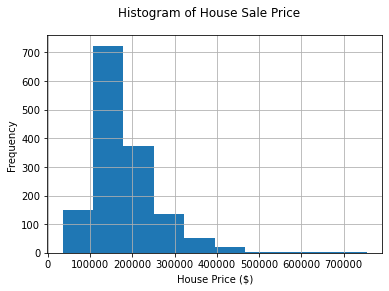

In [6]:
house_data['SalePrice'].hist()
plt.xlabel("House Price ($)")
plt.ylabel("Frequency")
plt.suptitle("Histogram of House Sale Price")
plt.show()

We can see that this data is heavily positively skewed, as expected. It makes sense for there to be a smaller number of very expensive houses. Another easy chart to look at first is a simple scatterplot of Sale Price vs Year Built to see the effect of newer houses vs older houses. This is an obvious simplification but I think it might be interesting.

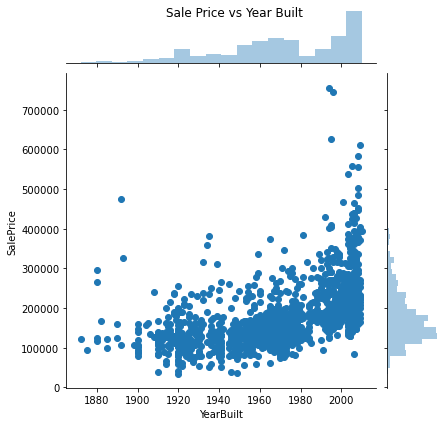

In [12]:
sns.jointplot(x='YearBuilt', y="SalePrice", data=house_data)
plt.suptitle("Sale Price vs Year Built")
plt.show()

Interestingly we can see that there is a big uptick in more expensive houses built recently, however this may also correlate with the year of sale. Deeper analysis is required.

In [18]:
missing_per_variable = house_data.isnull().sum()
missing_per_variable = missing_per_variable[missing_per_variable > 0]
missing_per_variable

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Variables
We have a lot of variables to work with - 80 in all! Let us first check whether there is any missing data:

Many of them are categorical, so we will transform these to a collection of binary variables before proceeding. 